In [2]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style("white")

Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.


The data is taken from __https://www.kaggle.com/uciml/student-alcohol-consumption__

The dataset is from Portugese secondary students from two schools. It contains 33 cloumns of data ranging from social, academic achievement, internet use, and everything in-between.

The goal is to find a correlation between a student's social life and academic success. The grades are from a range of 0-20, with 20 being a high grade. The columns G1, G2, and  G3 represent grades. G1 is the first period grade, G2 the second period grade, and G3 represents the final grade received.


In [3]:

#import data of students in a math course
df1=pd.read_csv("C:\\Users\\david\\Downloads\\student-mat.csv")

#import data of students in a Portugese language course
df2=pd.read_csv("C:\\Users\\david\\Downloads\\student-por.csv")


In [4]:
#Create a combined dataframe from the math and language course

combined = [df1, df2]

combined=pd.concat(combined)

## Cleaning the Data

 Some students appear in both courses so we must delete any duplicate student

In [5]:
combined=combined.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [6]:
combined

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


Demonstrating the correlation between all the features

In [6]:
continuous_data = combined.loc[:, ['age', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'G3']]

#Use for later maybe
#'Medu','Fedu','traveltime','studytime',

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


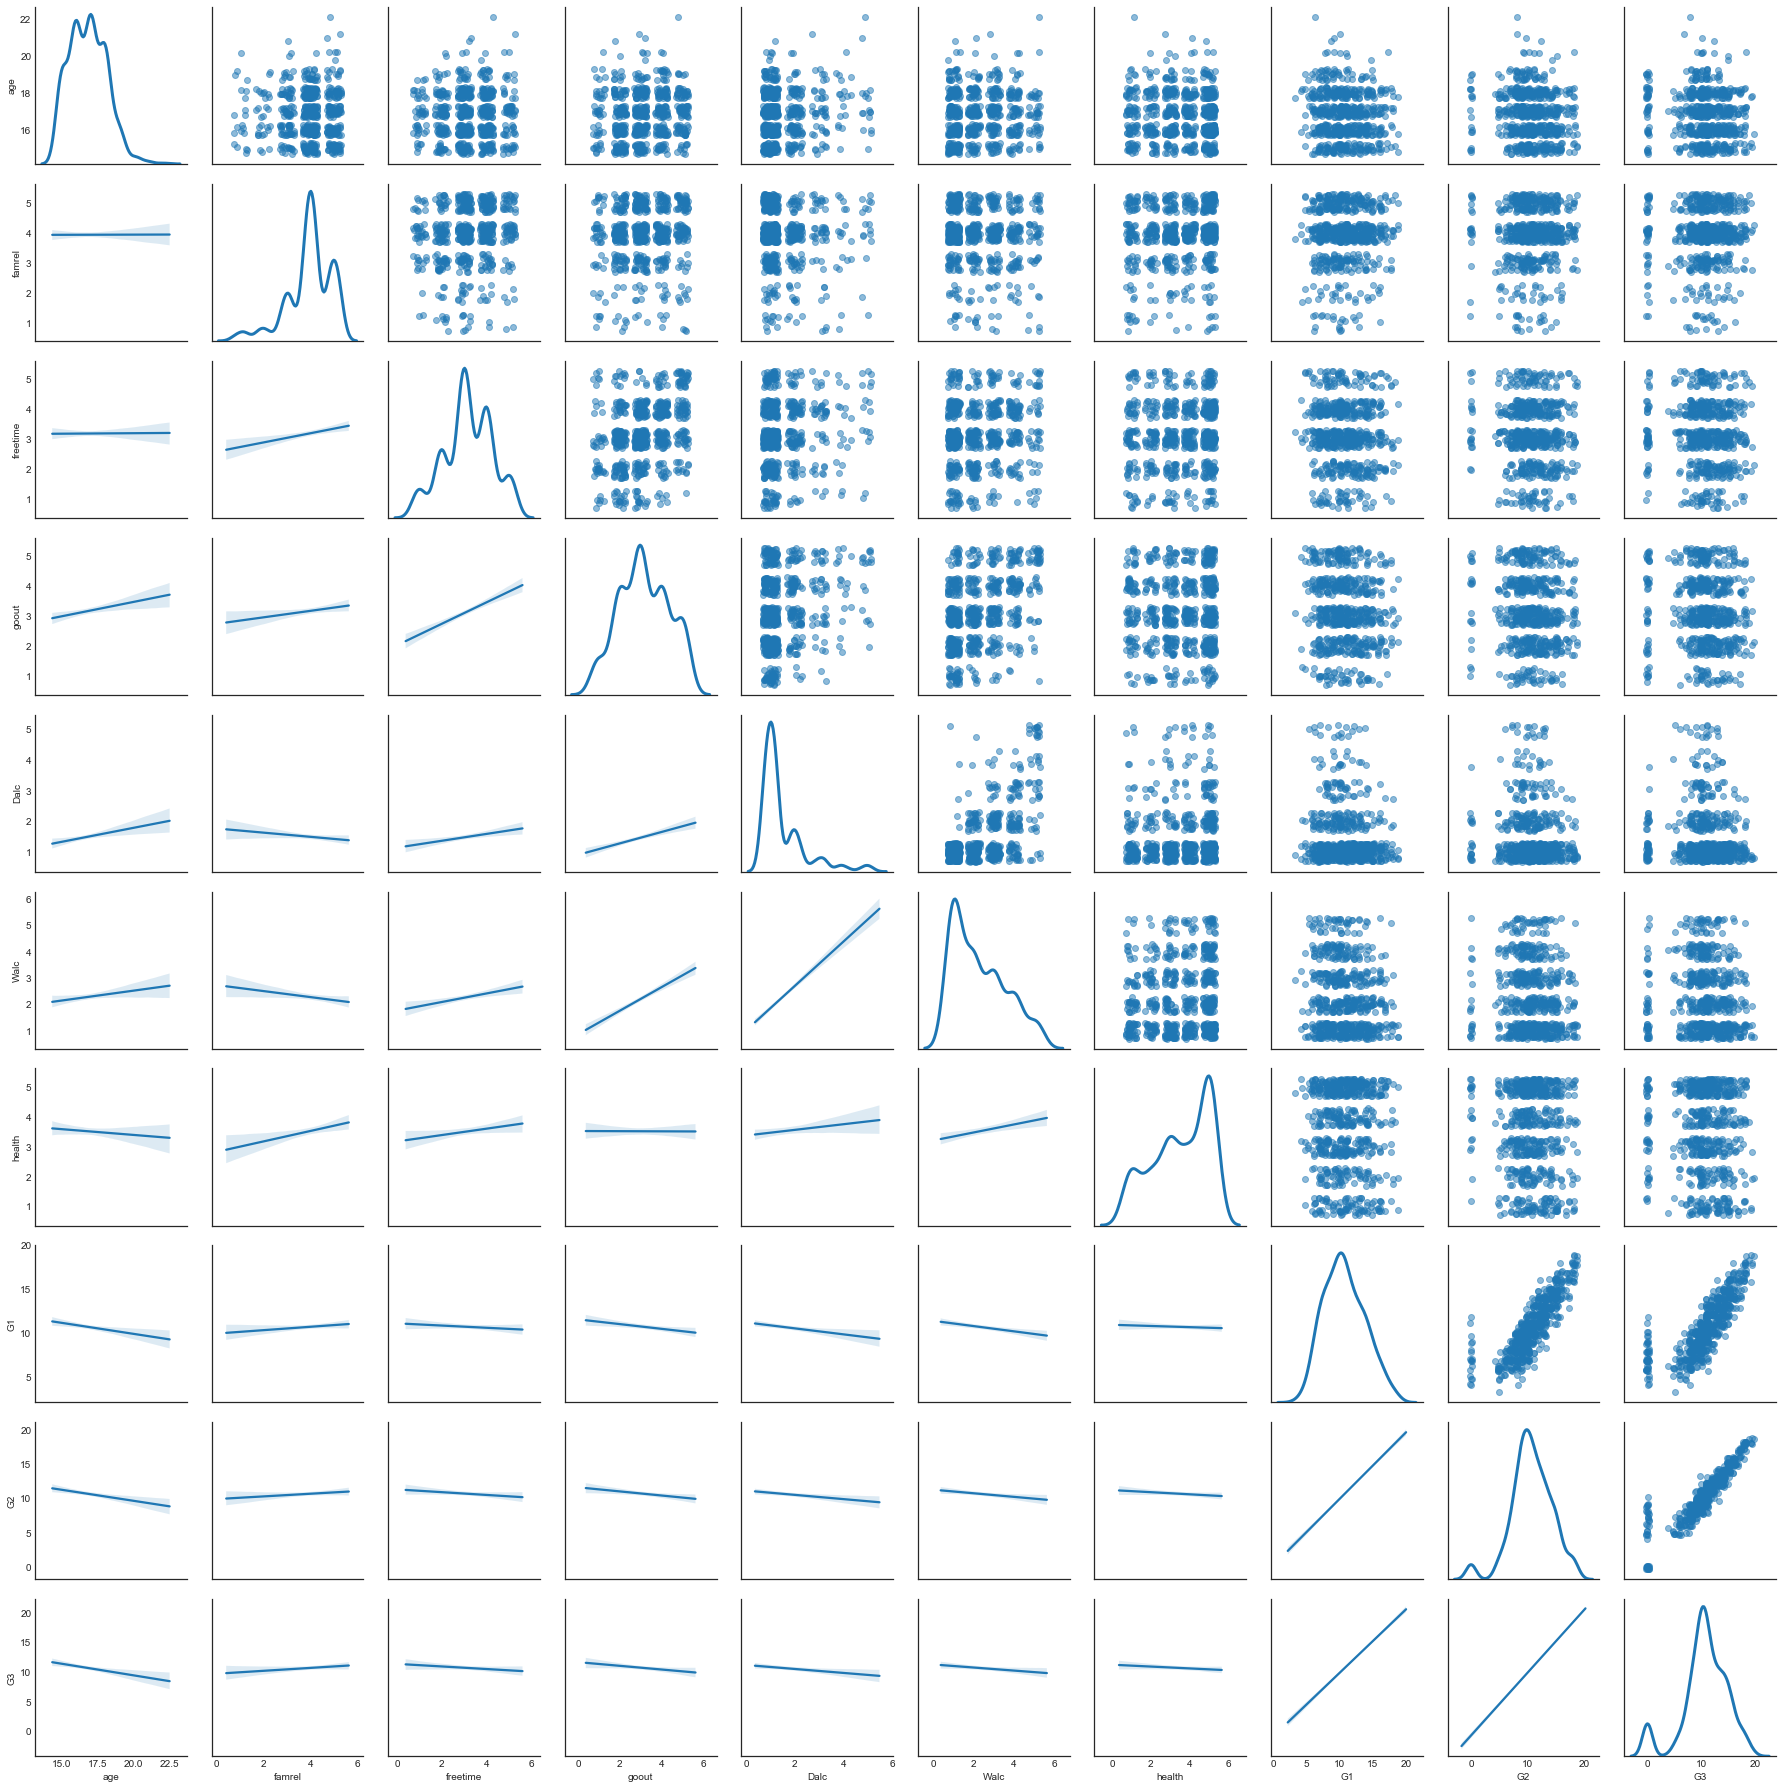

In [7]:
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(continuous_data.shape)),
    columns=continuous_data.columns
)
# Combine the data and the noise.
continuous_data = continuous_data.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(continuous_data.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

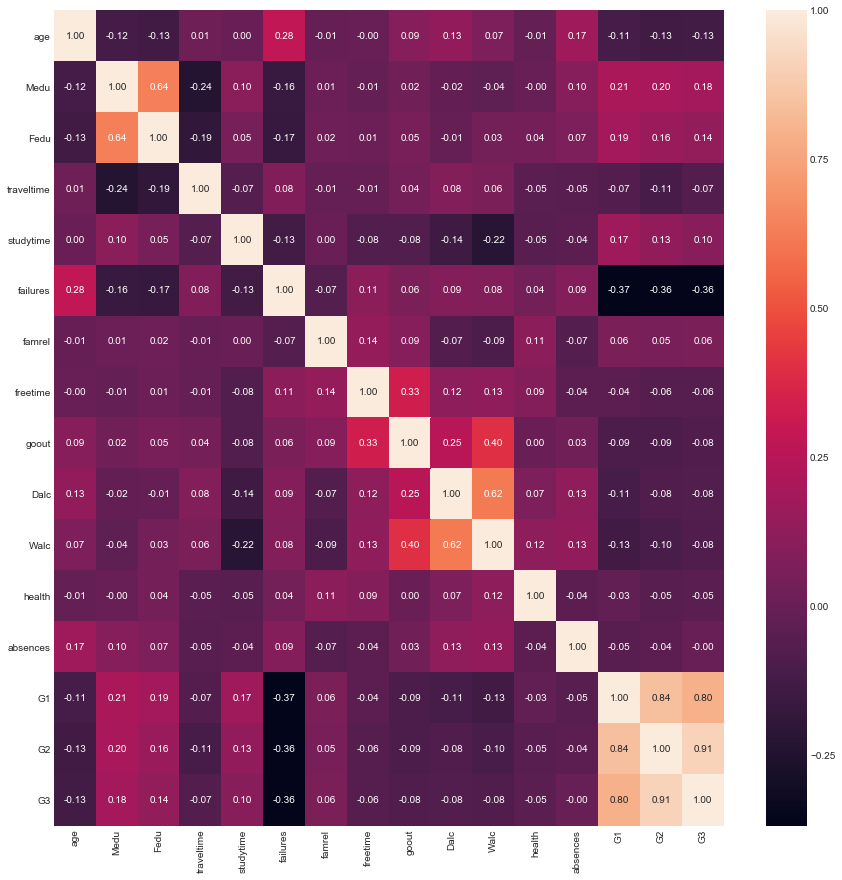

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.119031 -0.133645    0.014530   0.001454  0.280021   
Medu       -0.119031  1.000000  0.635156   -0.239830   0.104501 -0.163166   
Fedu       -0.133645  0.635156  1.000000   -0.189146   0.045236 -0.170862   
traveltime  0.014530 -0.239830 -0.189146    1.000000  -0.066172  0.078820   
studytime   0.001454  0.104501  0.045236   -0.066172   1.000000 -0.125250   
failures    0.280021 -0.163166 -0.170862    0.078820  -0.125250  1.000000   
famrel     -0.008453  0.010211  0.016171   -0.010459   0.003935 -0.068134   
freetime   -0.002414 -0.011450  0.009450   -0.007536  -0.077845  0.114463   
goout       0.094744  0.022866  0.053071    0.039607  -0.078264  0.060217   
Dalc        0.130655 -0.018013 -0.008774    0.084199  -0.139678  0.088939   
Walc        0.069320 -0.036381  0.032370    0.060548  -0.220301  0.084924   
health     -0.013347 -0.002183  0.038402   -0.045230  -0.054130  0.035372   

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(combined.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()
print(combined.corr())

Relating social activity to grades it seems that alchohol consumption leads to a decrease in grades. Let's delve into that a little further. Alcohol consumption is labeled __Dalc__ for weekday consumption and __Walc__ for weekend consumption. The data is ranked from 1 - very low to 5 - very high.

In [9]:
print("The mean score of weekday alcohol consumption:")
print(combined["Dalc"].mean())

print("The mean score of weekend alcohol consumption:")
print(combined["Walc"].mean())
      
print("The mean score of student's grades in the first grading period:")
print(combined["G1"].mean())
      
print("The mean score of student's grades in the second grading period was:")
print(combined["G2"].mean())
      
print("The mean score of student's final grades:")
print(combined["G3"].mean())

The mean score of weekday alcohol consumption:
1.5045317220543806
The mean score of weekend alcohol consumption:
2.282477341389728
The mean score of student's grades in the first grading period:
10.72809667673716
The mean score of student's grades in the second grading period was:
10.708459214501511
The mean score of student's final grades:
10.725075528700906


In [10]:
# Making dummies for ages.
# Also creating a data frame to hold our features.
age = pd.get_dummies(combined['age'])

# Age dummy.
age['18'] = np.where((combined['age'].isin(['18'])), 1, 0)

print(pd.crosstab(age['18'], combined['age']))

age   15   16   17   18  19  20  21  22
18                                     
0    112  173  178    0  45   8   3   1
1      0    0    0  142   0   0   0   0


In [11]:
# Making dummies for ages.
# Also creating a data frame to hold our features.
gender = pd.get_dummies(combined['sex'])

# Gender dummy.
gender['male'] = np.where((combined['sex'].isin(['male'])), 1, 0)

print(pd.crosstab(gender['male'], combined['sex']))

sex     F    M
male          
0     390  272


2     250
3     112
4     100
5      76
6      53
7      32
8      17
10     15
9       7
Name: alcohol, dtype: int64


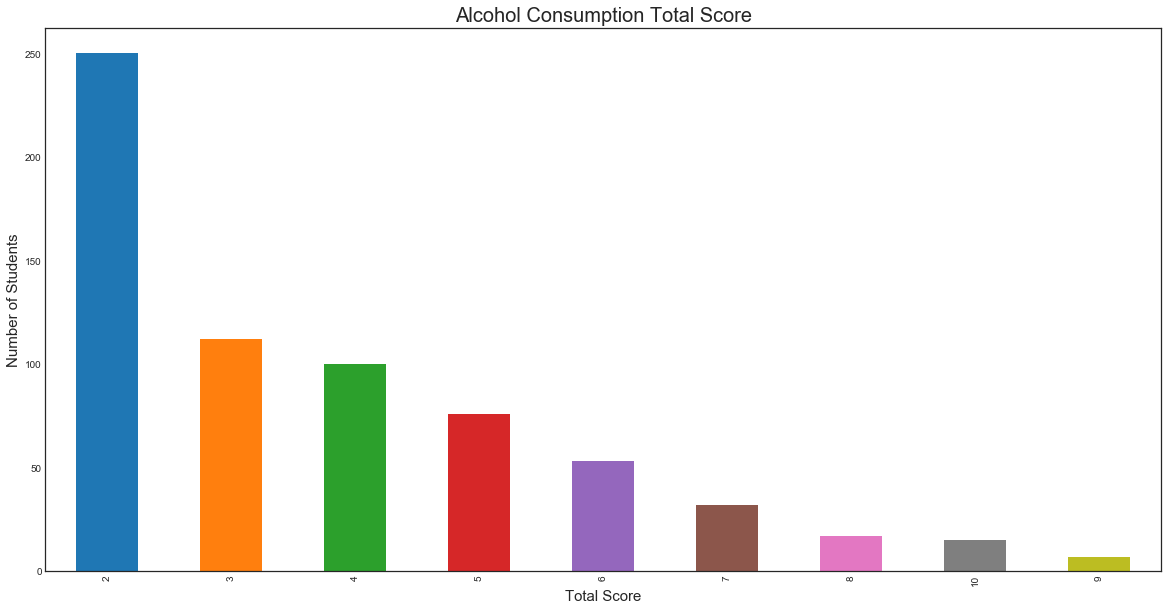

In [12]:
plt.figure(figsize=(20, 10))

combined['alcohol'] = combined['Dalc'] + combined['Walc']

alcohol_wk = combined.alcohol.value_counts()
print (alcohol_wk)

plt.ylabel('Number of Students', fontsize=15)
plt.xlabel('Total Score', fontsize=15)
plt.title('Alcohol Consumption Total Score', fontsize=20)

alcohol_wk.plot.bar()
plt.show()

#alc_columns = pd.DataFrame({'student':alcohol.index ,'weekday and weekend alc consumption':alcohol.values})


#sns.barplot(x='weekday and weekend alc consumption', y='student', data=alc_columns)

All students had at least a score of 2 when combining weekday and weekend alcohol consumption.

Let's go a step further by making a boxplot that will relate alcohol consumption to academic achievement. We will also look at age as an added variable.

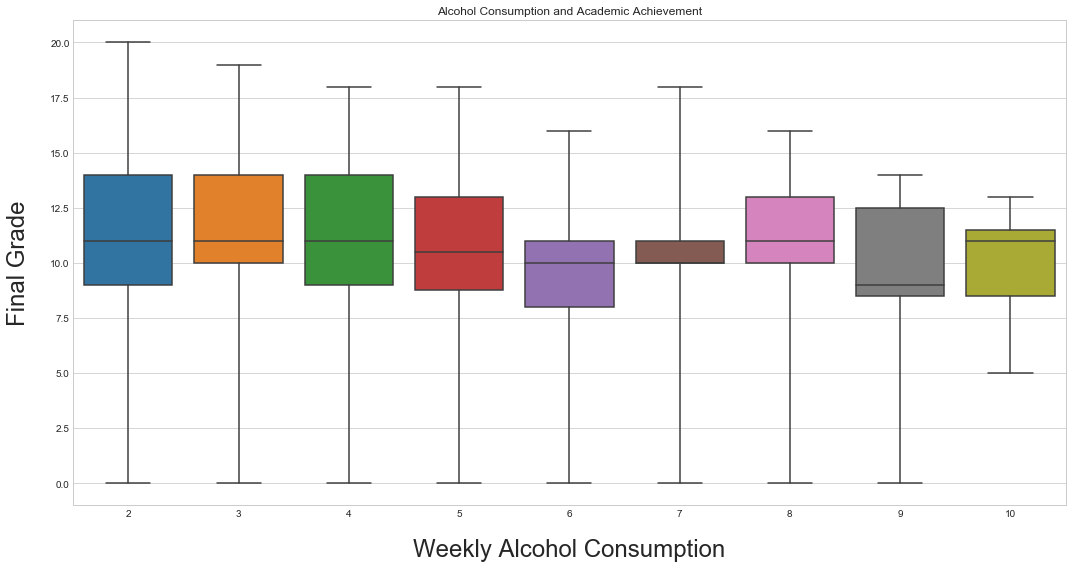

In [13]:


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
#ax = sns.violinplot(x="alcohol", y="G3", data=combined, inner=None)
ax = sns.boxplot(x="alcohol", y="G3", data=combined, whis=np.inf)
#ax = sns.swarmplot(x='alcohol',y='G3',hue='age', data=combined,dodge=True)
ax.set_xlabel("Weekly Alcohol Consumption", fontsize=24, labelpad = 20)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['2','3','4','5','6','7', '8', '9', '10'],rotation=0)
ax.set_title('Alcohol Consumption and Academic Achievement')
fig.tight_layout()

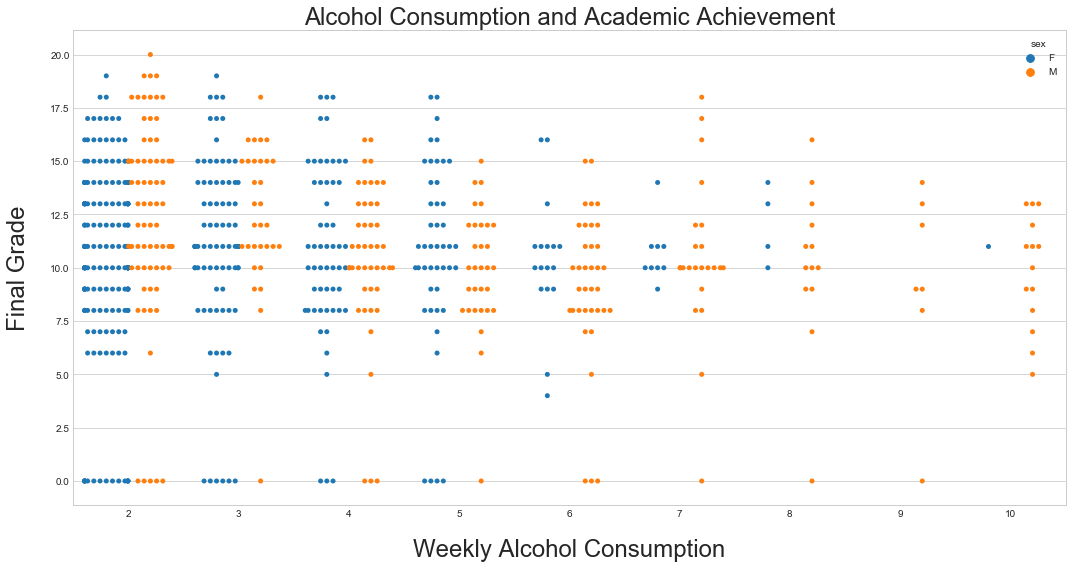

In [14]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.swarmplot(x='alcohol',y='G3',hue='sex', data=combined,dodge=True)
ax.set_xlabel("Weekly Alcohol Consumption", fontsize=24, labelpad = 20)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['2','3','4','5','6','7', '8', '9', '10'],rotation=0)
ax.set_title('Alcohol Consumption and Academic Achievement', fontsize=24)
fig.tight_layout()

## Features

#### How health and alcohol effect final grades. 

I will combine health and alcohol consumption and see how it effects grades 

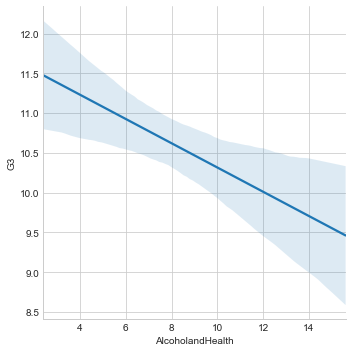

In [15]:
#combining the two factors

combined['AlcoholandHealth'] = combined['alcohol'] + combined['health']
combined['AlcoholandHealth']
# A plot of the interaction.# A plot 
sns.lmplot(
    x='AlcoholandHealth',
    y='G3',
    #hue='WorkLifeBalance',
    data=combined,
    scatter=False
)
plt.show()

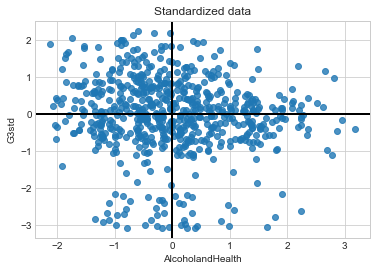

In [16]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
combined['AlcoholandHealth'] = (combined['AlcoholandHealth'] - combined['AlcoholandHealth'].mean()) / combined['AlcoholandHealth'].std()
combined['G3std'] = (combined['G3'] - combined['G3'].mean()) / combined['G3'].std()

t = sns.regplot(
    'AlcoholandHealth',
    'G3std',
    combined,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

#### Parents' Education Levels and Academic Achievement
I will look at how the combined education of their parents affects academics

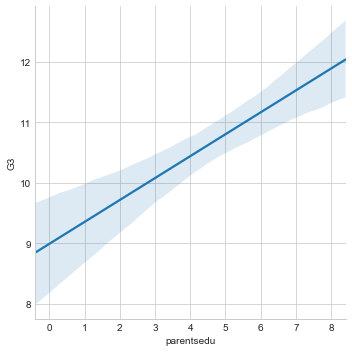

In [17]:
combined['parentsedu'] = combined['Fedu'] + combined['Medu']
combined['parentsedu']

sns.lmplot(
    x='parentsedu',
    y='G3',
    #hue='WorkLifeBalance',
    data=combined,
    scatter=False
)
plt.show()

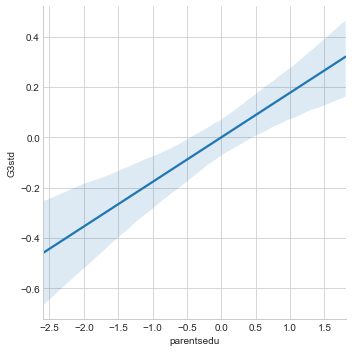

In [18]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
combined['parentsedu'] = (combined['parentsedu'] - combined['parentsedu'].mean()) / combined['parentsedu'].std()
combined['G3std'] = (combined['G3'] - combined['G3'].mean()) / combined['G3'].std()

sns.lmplot(
    x='parentsedu',
    y='G3std',
    #hue='WorkLifeBalance',
    data=combined,
    scatter=False
)
plt.show()
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

#### Father's Job in Services and as a Teacher
Next, I made a feature of father who work in the service industry and hose who work as a teacher and compared it aainst their children's final grades.

In [19]:
combined['fatherjob'] = np.where((combined['Fjob'].isin(['services','teacher'])),1,0)

print(pd.crosstab(combined['fatherjob'],combined['G3']))

G3         0   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  \
fatherjob                                                                       
0          29   1   4  13  14  38  32  74  65  30  40  34  33  12   7  13   4   
1          16   0   3   3   2  20  20  34  30  18  12  17  16  12   9   5   1   

G3         20  
fatherjob      
0           0  
1           1  


#### Grades of students who are more likely to stay in
Next, I made a feature of children who stayed in asx opposed to going out and looked at how they performed in the classroom.The column "goout" rates the student's likeliness to go out from 1 to 5.

A higher score on the boxplot now represents a student's likelihood to stay in rather than go out with friends.

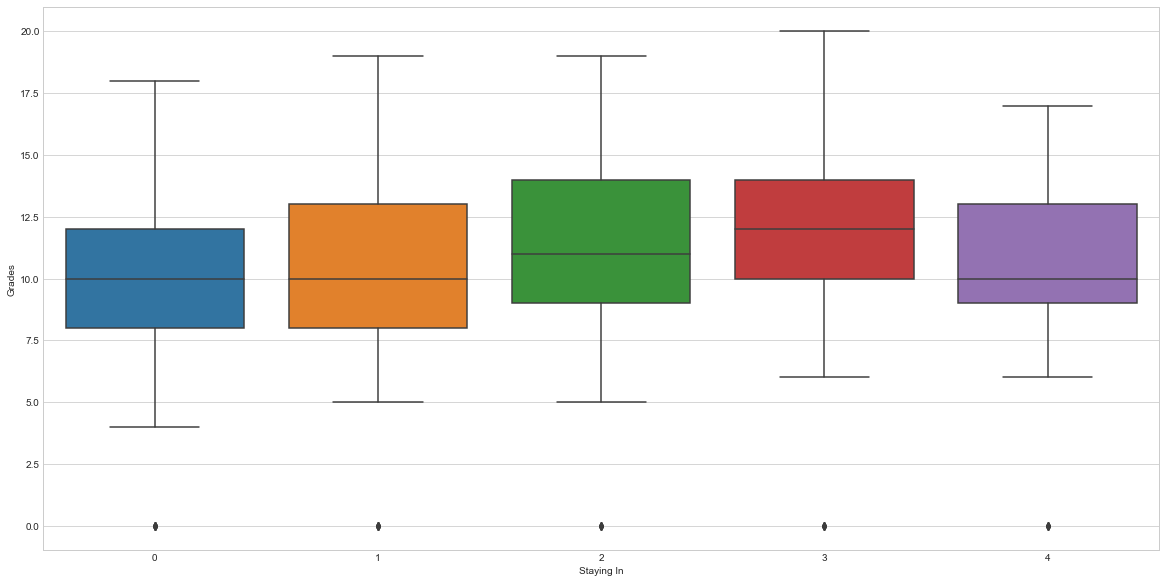

In [20]:
plt.figure(figsize=(20, 10))
combined['stayin'] = max(combined['goout']) - combined['goout']

sns.boxplot(
    combined['stayin'],
    combined['G3']
)
plt.xlabel('Staying In')
plt.ylabel('Grades')
plt.show()

#### Grades of those 17 and older
I wanted to see if students were affected by "senioritis". I looked at the grades of students higher than 17 years old who may be headed towards graduation and whose grades may have slipped as they were anxious to leave

In [21]:
combined['17_plus'] = np.where(combined['age']>=17, 1, 0)

# Check to make sure it worked.
print(combined['G3'].groupby(combined['17_plus']).describe())

         count       mean       std  min   25%   50%   75%   max
17_plus                                                         
0        285.0  11.192982  3.908453  0.0  10.0  11.0  14.0  20.0
1        377.0  10.371353  4.221277  0.0   9.0  10.0  13.0  19.0
